In [69]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [3]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

In [45]:
paths = []
labels = []
data = []
for dirname, _, filenames in os.walk(r"C:\Users\HP\Desktop\SER\SER"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        labels.append(int(filename[7:8])-1)
        wav_file_name = os.path.join(dirname, filename)
        data.append(extract_mfcc(wav_file_name))
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [46]:
data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346544e-01,  1.2435786e+01,
         7.7339506e+00,  5.3075010e-01, -3.2166312e+00, -3.1593945e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529748e-01, -3.0370669e+00,
         1.9554467e+00, -3.7356679e+00,  4.3770027e-01,  7.8235650e-01,
        -4.0714288e+00, -1.8607764e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476104e+00, -5.0543821e-01, -2.3373914e+00, -4.5227795e+00,
        -1.6797223e+00, -8.1932092e-01, -4.8584828e+00,  2.5533596e-01,
        -2.1487041e+00,  1.4505495e-01, -2.0357561e+00, -2.1196339e+00,
        -2.7125885e+00, -1.8361268e+00, -3.2048049e+00, -1.5453683e+00,
        -1.0909374e+00, -1.7701062e+00, -3.5011322e+00, -1.5380872e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038307e+01,
         8.8188105e+00, -1.4658618e-01, -1.3733917e+00, -5.2931800e+00,
        -1.1623182e+01, -1.3482836e+00,  8.4371448e-01, -2.6412783e+00,
         1.0172496e+00, -3.2715344e+00, 

In [47]:
data_array = np.asarray(data)
label_array = np.asarray(labels)
label_array.shape

labels_categorical = to_categorical(label_array)
labels_categorical.shape

(2880, 8)

In [48]:
data_array

array([[-6.9779260e+02,  5.4890041e+01,  6.6346544e-01, ...,
        -1.7701062e+00, -3.5011322e+00, -1.5380872e+00],
       [-6.9285577e+02,  5.5363899e+01, -1.5483193e+00, ...,
        -3.0869722e+00, -3.2097483e+00, -2.3071594e+00],
       [-6.9158789e+02,  5.8024662e+01,  1.5946446e-01, ...,
        -2.7295372e+00, -3.5089064e+00, -2.2463746e+00],
       ...,
       [-5.4125165e+02,  2.9595709e+01, -1.8001362e+01, ...,
        -3.8906687e-01, -9.7194743e-01, -3.9210208e-03],
       [-4.9265253e+02,  2.3887981e+01, -6.0266585e+00, ...,
         9.1637725e-01, -1.4326899e+00,  1.4300117e+00],
       [-5.1798480e+02,  2.9571215e+01, -3.9096987e+00, ...,
        -1.2455594e-01, -1.8519229e+00,  7.0855039e-01]], dtype=float32)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(np.array(data_array), labels_categorical, test_size = 0.20, random_state = 9)

In [50]:
number_of_samples = data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [51]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation("relu"))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation("relu"))
    model.add(Dense(8))
    model.add(Activation("softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
    return model


In [52]:
w = np.expand_dims(data_array[:training_samples],-1)

In [53]:
w.shape

(2304, 40, 1)

In [56]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(data_array[:training_samples], -1), labels_categorical[:training_samples], validation_data = (np.expand_dims(data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True)

Epoch 1/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1431 - loss: 2.0675 - val_accuracy: 0.2604 - val_loss: 1.9914
Epoch 2/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1917 - loss: 2.0014 - val_accuracy: 0.3021 - val_loss: 1.9102
Epoch 3/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2441 - loss: 1.9422 - val_accuracy: 0.3194 - val_loss: 1.8205
Epoch 4/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2607 - loss: 1.9077 - val_accuracy: 0.2882 - val_loss: 1.8460
Epoch 5/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2921 - loss: 1.8629 - val_accuracy: 0.3090 - val_loss: 1.7788
Epoch 6/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2972 - loss: 1.8369 - val_accuracy: 0.3160 - val_loss: 1.7855
Epoch 7/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2894 - loss: 1.8344 - val_accuracy: 0.2951 - val_loss: 1.7812
Epoch 8/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2949 - loss: 1.8166 - val_accuracy: 0.

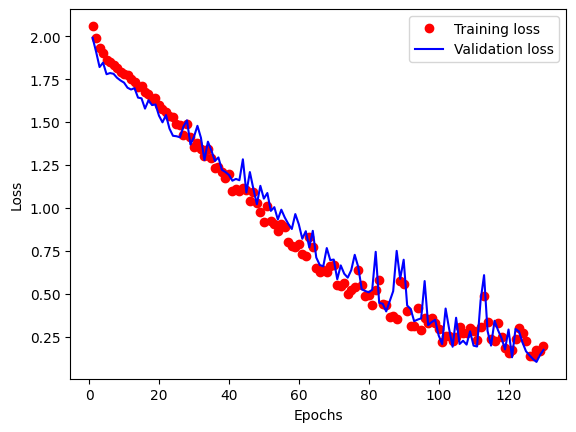

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range (1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs , val_loss ,'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

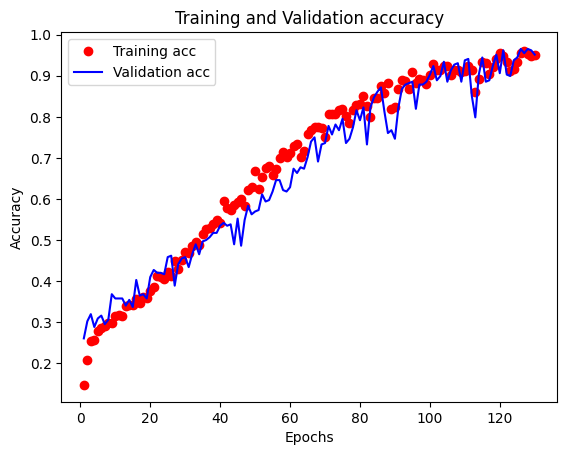

In [61]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs , val_acc ,'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
model_A.evaluate(np.expand_dims(data_array[training_samples+validation_samples:],-1),labels_categorical[training_samples + validation_samples:])

emotions = {1 : "neutral", 2 : "calm", 3 : "happy", 4 : "sad", 5 : 'angry',6 : "fearful", 7 : "disgust", 8 : "surprise"}
def predict(wav_filepath):
    test_point =  extract_mfcc(wav_filepath)
    test_point = np.reshape(test_point, newshape = (1,40,1))
    predictions = model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0])+1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9238 - loss: 0.1910


In [64]:
predict(r"C:\Users\HP\Desktop\SER\SER\audio_speech_actors_01-24\Actor_10\03-01-02-01-01-01-10.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
calm


In [65]:
predict(r"C:\Users\HP\Desktop\SER\SER\audio_speech_actors_01-24\Actor_10\03-01-08-01-01-01-10.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
surprise


In [66]:
predict(r"C:\Users\HP\Desktop\SER\SER\audio_speech_actors_01-24\Actor_10\03-01-06-01-01-01-10.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
fearful


In [67]:
model_A.save('mymodel.h5')

In [70]:
modelc= tf.keras.models.load_model('mymodel.h5')